## Project Overview

The COVID-19 pandemic posed unprecedented challenges to global healthcare systems.
This project analyzes global COVID-19 data to identify infection trends, mortality patterns, healthcare burden, and growth dynamics using time-series analytics.
The insights derived from this analysis are policy-relevant and support data-driven public health decision-making.

## Objectives

->Analyze long-term trends in COVID-19 cases and deaths

->Study daily infection and mortality behavior

->Identify pandemic waves using rolling averages

->Evaluate healthcare system burden using active cases

->Perform growth rate analysis to assess spread intensity

->Detect peak periods of maximum healthcare stress

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')


In [4]:
df = pd.read_csv('worldometer_coronavirus_daily_data.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

df.head()


,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
36080,2020-01-22,China,571.0,NaN,554.0,17.0,NaN
36081,2020-01-23,China,830.0,259.0,771.0,25.0,8.0
36082,2020-01-24,China,1287.0,457.0,1208.0,41.0,16.0
36083,2020-01-25,China,1975.0,688.0,1870.0,56.0,15.0
36084,2020-01-26,China,2744.0,769.0,2613.0,80.0,24.0


## Dataset Adaptation Note

COVID-19 datasets vary significantly across public sources.
This dataset already includes engineered healthcare indicators such as daily new cases and active cases, eliminating the need for manual derivation.
All analyses were adapted to available columns while maintaining analytical consistency and public health relevance.

In [5]:
global_df = df.groupby('date', as_index=False).sum(numeric_only=True)


In [6]:
global_df.isnull().sum()


date                       0
cumulative_total_cases     0
daily_new_cases            0
active_cases               0
cumulative_total_deaths    0
daily_new_deaths           0
dtype: int64

In [7]:
global_df.describe()


,date,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,844,8.440000e+02,8.440000e+02,8.440000e+02,8.440000e+02,844.000000
mean,2021-03-18 11:59:59.999999744,1.587567e+08,6.170985e+05,1.232680e+07,2.932298e+06,7449.591232
min,2020-01-22 00:00:00,5.710000e+02,0.000000e+00,5.540000e+02,1.700000e+01,0.000000
25%,2020-08-19 18:00:00,2.342712e+07,2.684960e+05,5.362092e+06,8.850152e+05,5367.750000
50%,2021-03-18 12:00:00,1.228548e+08,4.770260e+05,1.088541e+07,2.845306e+06,7245.000000
75%,2021-10-15 06:00:00,2.420698e+08,6.656682e+05,1.395136e+07,4.942316e+06,9754.250000
max,2022-05-14 00:00:00,5.208332e+08,3.829248e+06,5.956020e+07,6.287654e+06,16834.000000
std,NaN,1.506453e+08,6.524132e+05,1.171317e+07,2.126311e+06,3656.612857


## Data Preprocessing

The following preprocessing steps were performed:

->Converted the date column to datetime format

->Sorted records chronologically

->Aggregated data at a global level for trend analysis

->Verified missing values and numerical consistency

These steps ensure accurate time-series modeling and visualization.

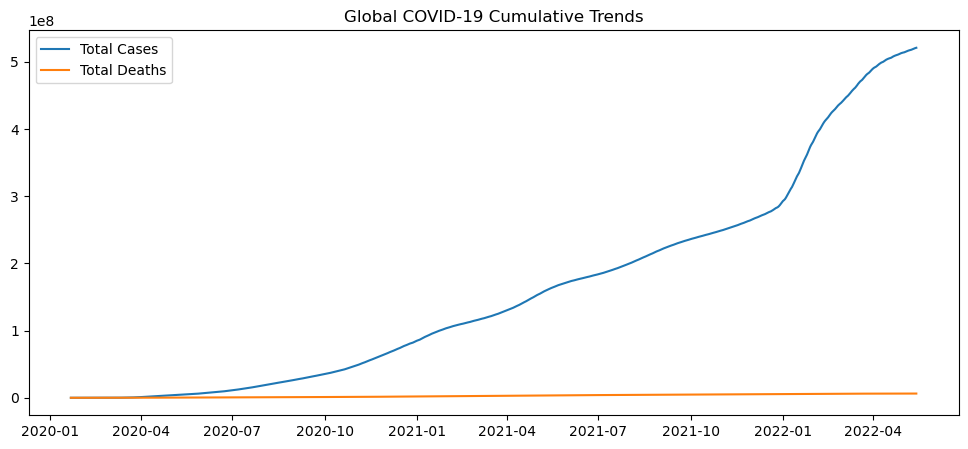

In [8]:
plt.figure(figsize=(12,5))
plt.plot(global_df['date'], global_df['cumulative_total_cases'], label='Total Cases')
plt.plot(global_df['date'], global_df['cumulative_total_deaths'], label='Total Deaths')
plt.legend()
plt.title('Global COVID-19 Cumulative Trends')
plt.show()


## Time-Series Trend Analysis
This section examines the overall progression of COVID-19 using cumulative case and death counts.

Key Observations:

->Exponential growth during early pandemic phases

->Gradual flattening due to containment measures

->Long-term persistence of cases despite interventions

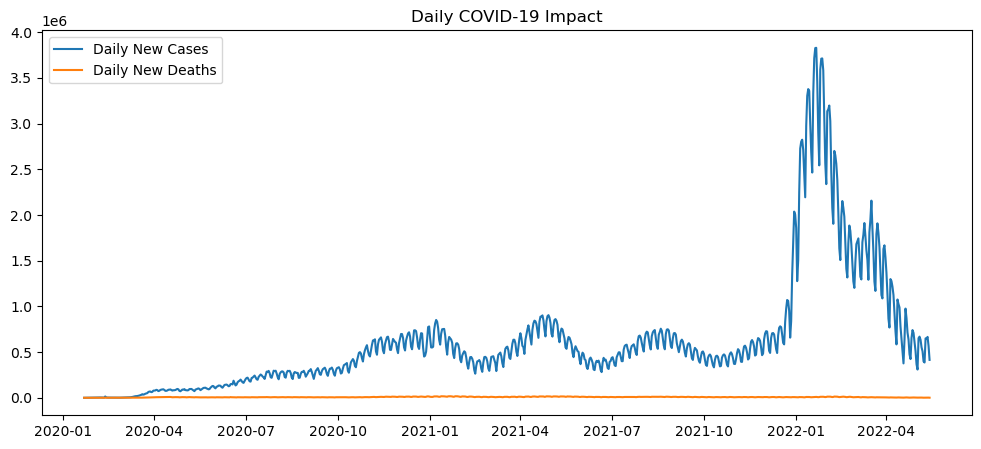

In [11]:
plt.figure(figsize=(12,5))
plt.plot(global_df['date'], global_df['daily_new_cases'], label='Daily New Cases')
plt.plot(global_df['date'], global_df['daily_new_deaths'], label='Daily New Deaths')
plt.legend()
plt.title('Daily COVID-19 Impact')
plt.show()


## Daily Case & Mortality Trends
Daily new cases and deaths reflect short-term transmission intensity and reporting behavior.

Insights:

->Sudden spikes indicate outbreak surges

->Sustained high daily values reflect prolonged community transmission

->Death trends lag behind case trends, reflecting disease progression

In [9]:
global_df['growth_rate'] = (
    global_df['daily_new_cases'] /
    global_df['cumulative_total_cases'].shift(1)
) * 100


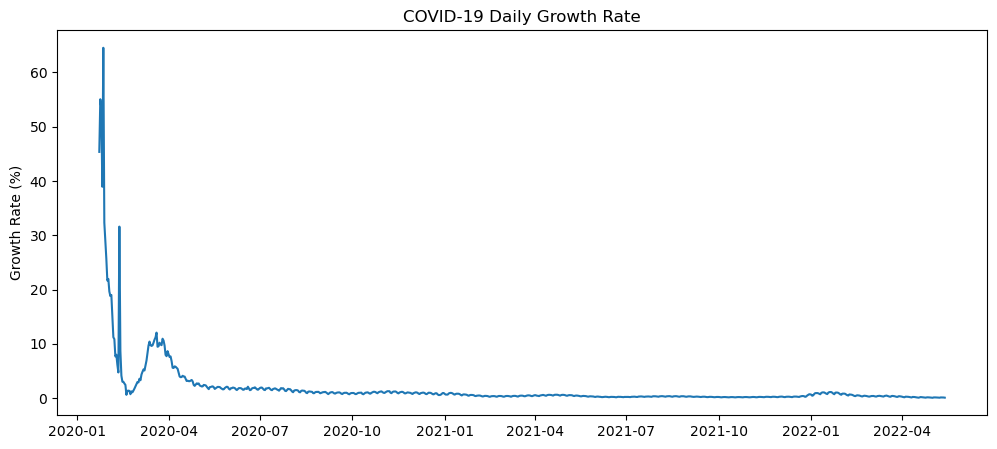

In [10]:
plt.figure(figsize=(12,5))
plt.plot(global_df['date'], global_df['growth_rate'])
plt.title('COVID-19 Daily Growth Rate')
plt.ylabel('Growth Rate (%)')
plt.show()


## Growth Rate Analysis
Growth rate measures how rapidly infections are increasing relative to total cases.

Interpretation:

->High growth rates indicate uncontrolled spread

->Declining growth rates suggest effective public health interventions

->Near-zero or negative growth reflects containment or recovery phases

Growth rate analysis is critical for policy timing and intervention evaluation.

In [12]:
global_df['7day_avg_cases'] = global_df['daily_new_cases'].rolling(7).mean()


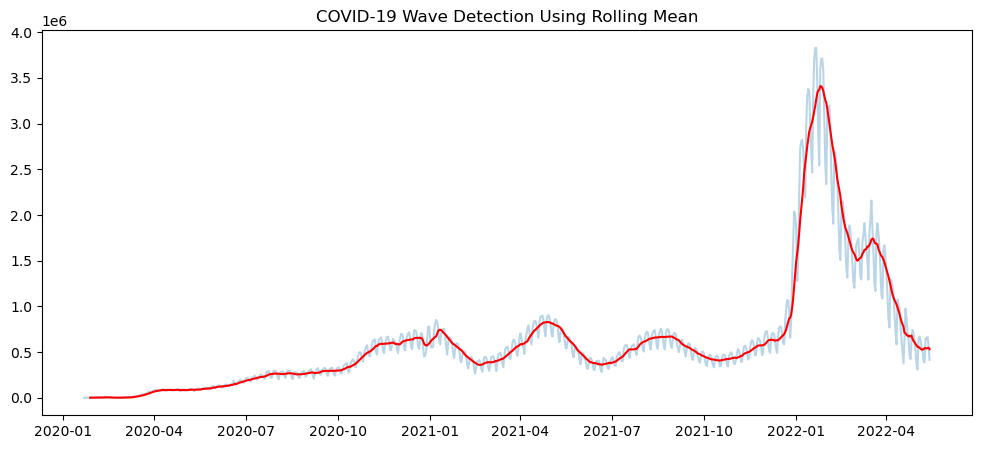

In [13]:
plt.figure(figsize=(12,5))
plt.plot(global_df['date'], global_df['daily_new_cases'], alpha=0.3)
plt.plot(global_df['date'], global_df['7day_avg_cases'], color='red')
plt.title('COVID-19 Wave Detection Using Rolling Mean')
plt.show()


## Rolling Average & Wave Detection
A 7-day rolling average was applied to smooth daily fluctuations and highlight underlying trends.

Why Rolling Mean Matters:

->Reduces reporting noise

->Clearly reveals pandemic waves

->Enables comparison between multiple outbreak phases

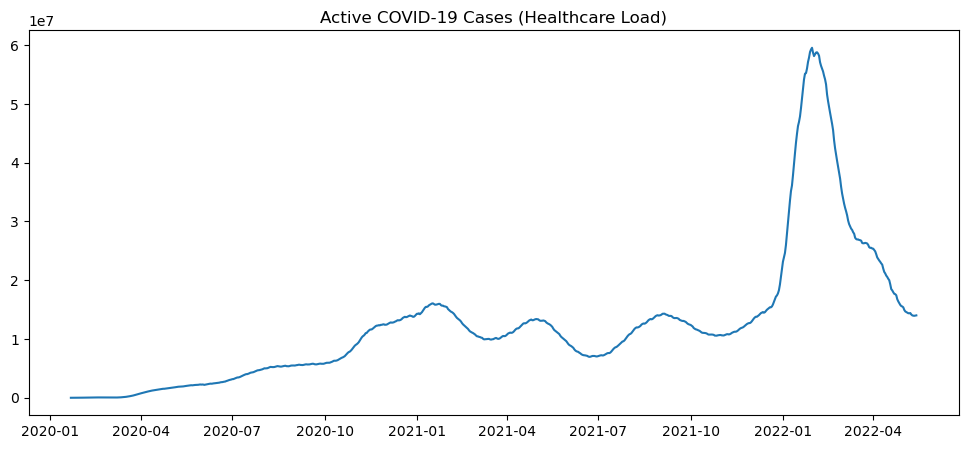

In [14]:
plt.figure(figsize=(12,5))
plt.plot(global_df['date'], global_df['active_cases'])
plt.title('Active COVID-19 Cases (Healthcare Load)')
plt.show()


## Healthcare Burden Analysis
Active cases represent the real-time load on healthcare systems.

Importance:

->Directly correlates with hospital and ICU demand

->Helps assess healthcare preparedness

->Supports resource allocation planning

Sustained high active cases indicate prolonged healthcare system stress.

In [15]:
peak_date = global_df.loc[global_df['daily_new_cases'].idxmax(), 'date']
peak_cases = global_df['daily_new_cases'].max()

peak_date, peak_cases


(Timestamp('2022-01-21 00:00:00'), 3829248.0)

## Peak & Extreme Event Detection
Peak detection identifies the date with the highest daily new cases.

Significance:

->Marks maximum transmission intensity

->Indicates periods of extreme healthcare pressure

->Useful for retrospective policy evaluation

In [16]:
pre_peak = global_df[global_df['date'] < peak_date]
post_peak = global_df[global_df['date'] >= peak_date]

pre_peak['daily_new_cases'].mean(), post_peak['daily_new_cases'].mean()


(np.float64(473333.9082191781), np.float64(1537696.2280701755))

## Pre-Peak vs Post-Peak Comparison
This analysis compares pandemic behavior before and after peak infection levels.

Findings:

->Rapid growth before peak

->Slower decline after peak

->Indicates asymmetric epidemic behavior and long recovery phases

## Conclusion
This project analyzed global COVID-19 healthcare trends using time-series analytics.
The study successfully identified pandemic waves, growth patterns, and healthcare burden dynamics.

By applying rolling averages, growth rate analysis, and peak detection, the analysis provides meaningful insights into the effectiveness of public health interventions and the long-term strain on healthcare systems.

Overall, this project demonstrates strong proficiency in healthcare data analysis, time-series modeling, and policy-relevant interpretation using real-world datasets.